In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = 'dog.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate histogram
def histogram(gray, G):
    hist = np.zeros(G)
    for row in gray:
        for pixel in row:
            hist[pixel] += 1
    return hist

G = 256
hist = histogram(gray, G)


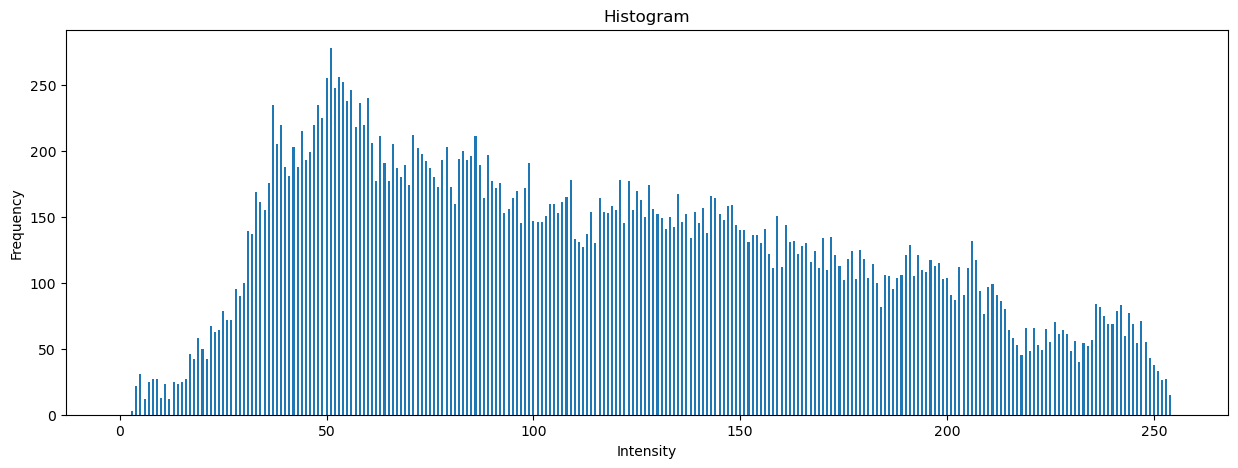

In [3]:
def plot_histogram(hist, width=0.5, figsize=(15, 5), xlabel='Intensity', ylabel='Frequency', title='Histogram'):
    plt.figure(figsize=figsize)
    plt.bar(np.arange(len(hist)), hist, width=width)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plot_histogram(hist)


In [4]:
# Calculate cumulative histogram (CDF)
hist_cum = hist.cumsum()

# Normalize the CDF
cdf_normalized = (hist_cum - hist_cum.min()) * 255 / (hist_cum.max() - hist_cum.min())

# Round and convert to integer
t = cdf_normalized.astype('uint8')


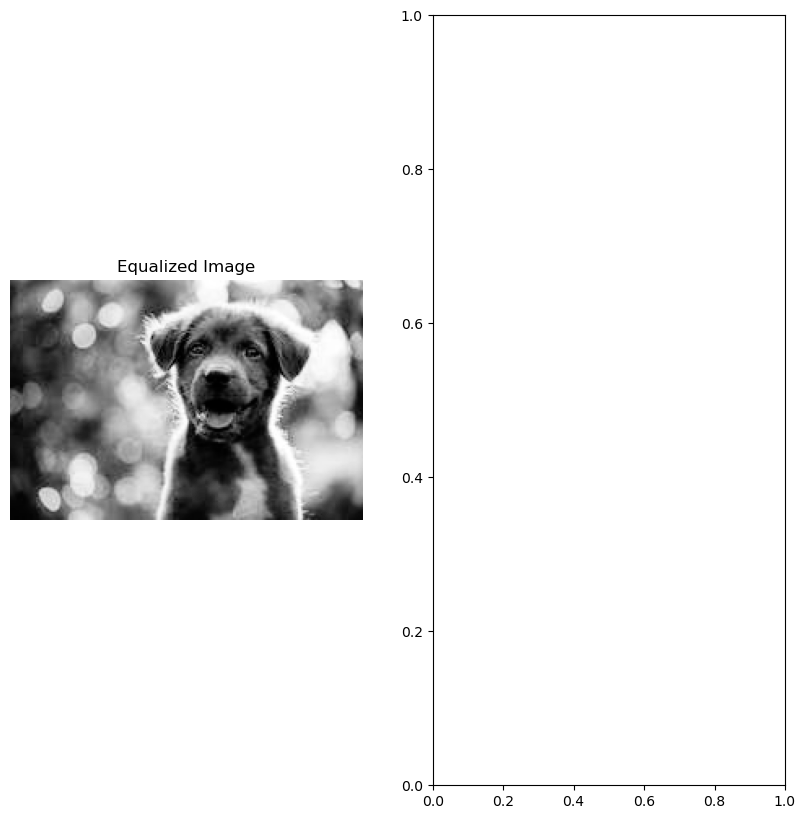

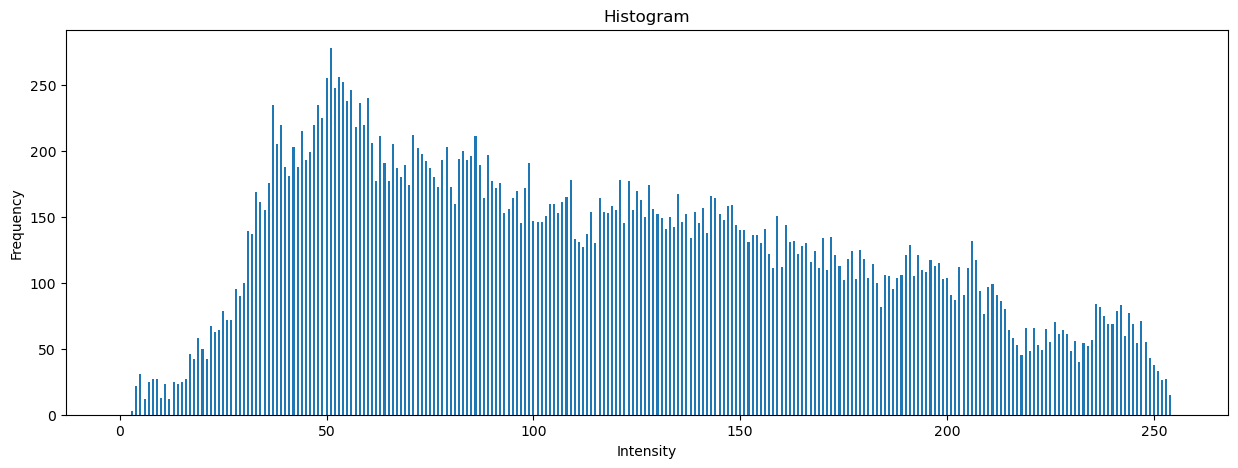

<Figure size 640x480 with 0 Axes>

In [5]:
# Apply histogram equalization
output = t[gray]

# Plot the equalized image and its histogram
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(output, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plot_histogram(hist)

plt.tight_layout()
plt.show()
